# Practico 5 - Generación de variables aleatorias continuas

In [2]:
from random import random
import numpy as np 
import time
import matplotlib.pyplot as plt
from scipy.stats import norm

## Ejercicio 1

In [3]:
# a)

def transformada_inv_a():
    u = random()
    if u < 1/4:
        return 2 + 2 * np.sqrt(u)
    else:
        return 6 - 6 * np.sqrt((1 - u) / 3)

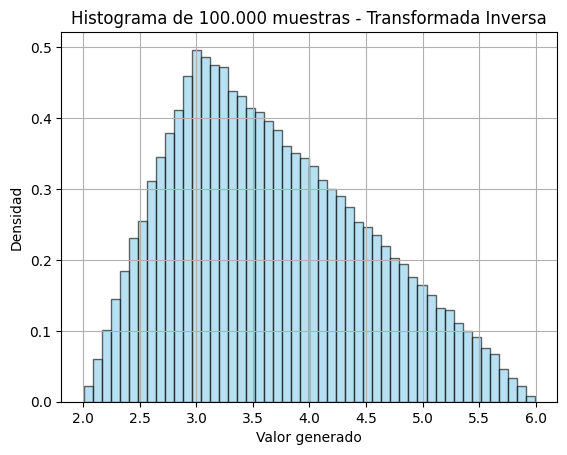

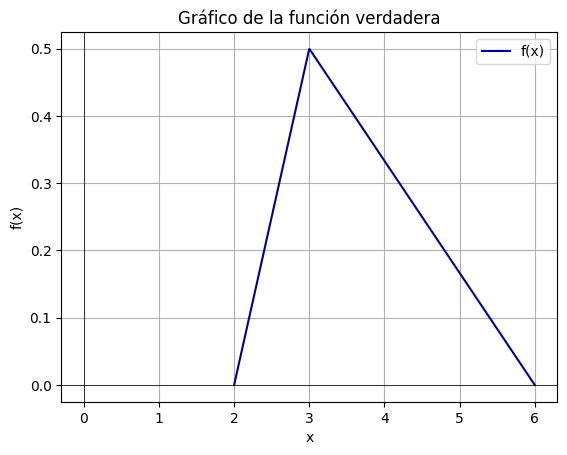

In [4]:
# Generar 10.000 muestras
iteraciones = [transformada_inv_a() for _ in range(100000)]

# Plotar histograma
plt.hist(iteraciones, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title('Histograma de 100.000 muestras - Transformada Inversa')
plt.xlabel('Valor generado')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

def f(x):
    return np.piecewise(x, 
                        [ (2 <= x) & (x <= 3), 
                          (3 < x) & (x <= 6)],
                        [lambda x: (x-2)/2, 
                         lambda x: (2-(x/3))/2,
                         0])

# Crear el dominio extendido para visualizar claramente los tramos
x = np.linspace(2, 6, 500)
y = f(x)

# Graficar
plt.plot(x, y, label='f(x)', color='darkblue')
plt.title('Gráfico de la función verdadera')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

In [5]:
# b)

def transformada_inv_b():
    u = random()
    if u < 3/5:
        return (-18 + 35 * np.sqrt(324/1225 + 12/35 * u)) / 6
    else:
        return ((35 * u - 19) / 2) ** (1 / 3)

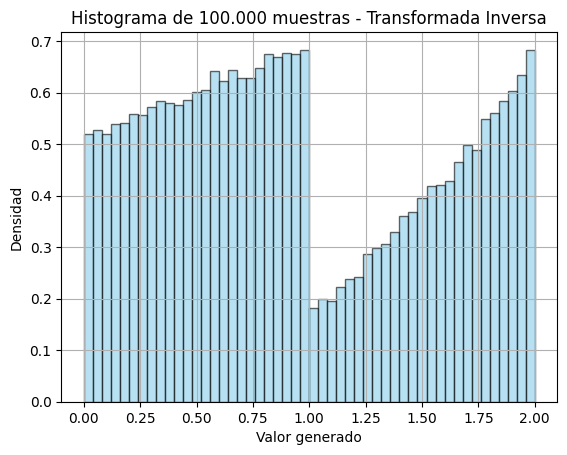

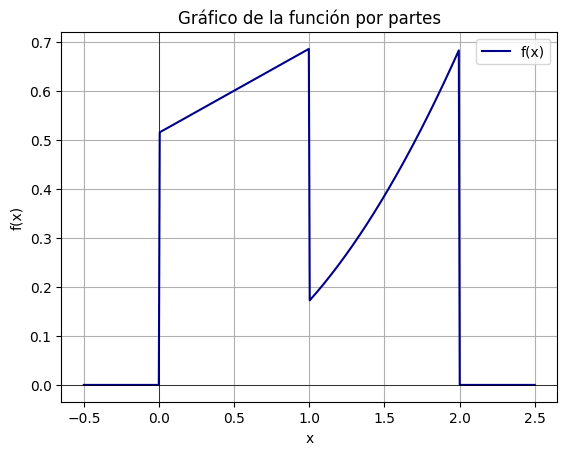

In [6]:
iteraciones = [transformada_inv_b() for _ in range(100000)]
# Plotar histograma
plt.hist(iteraciones, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title('Histograma de 100.000 muestras - Transformada Inversa')
plt.xlabel('Valor generado')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

def f(x):
    return np.piecewise(x, 
                        [ (0 <= x) & (x <= 1), 
                          (1 < x) & (x <= 2)],
                        [lambda x: (6*(x + 3))/35, 
                         lambda x: (6*x**2)/35,
                         0])

# Crear el dominio extendido para visualizar claramente los tramos
x = np.linspace(-0.5, 2.5, 500)
y = f(x)

# Graficar
plt.plot(x, y, label='f(x)', color='darkblue')
plt.title('Gráfico de la función por partes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

In [7]:
# c)

def transformada_inv_c():
    u = random()
    if u < 1/16:
        return np.log(16 * u) / 4
    else:
        return 4 * u - 1/4

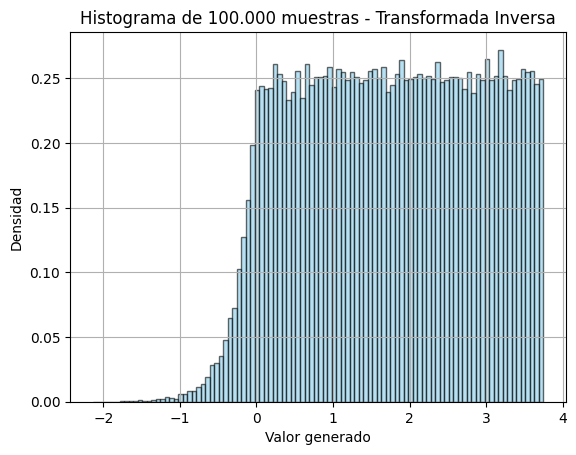

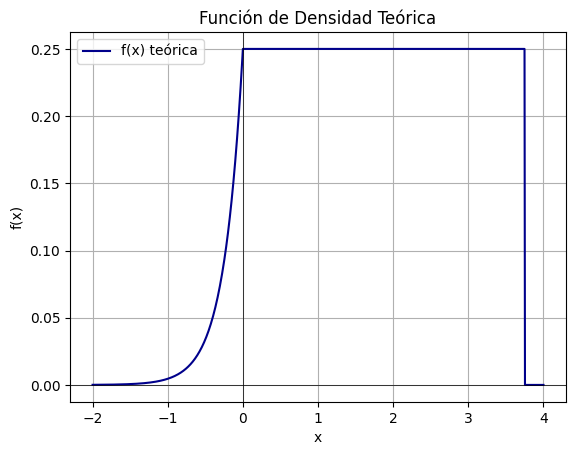

In [8]:
iteraciones = [transformada_inv_c() for _ in range(100000)]
# Plotar histograma
plt.hist(iteraciones, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title('Histograma de 100.000 muestras - Transformada Inversa')
plt.xlabel('Valor generado')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# Función de densidad teórica
def f_teorica(x):
    return np.piecewise(x,
                        [x <= 0, (x > 0) & (x <= 15/4)],
                        [lambda x: (1/4) * np.exp(4 * x),  # tramo exponencial
                         lambda x: 1/4,                   # tramo constante
                         0])

# Dominio extendido para visualizar toda la densidad
x_vals = np.linspace(-2, 4, 1000)
y_vals = f_teorica(x_vals)

# Graficar la densidad teórica
plt.plot(x_vals, y_vals, label='f(x) teórica', color='darkblue')
plt.title('Función de Densidad Teórica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


## Ejercicio 2

### i) Distribucion Pareto:
$$ f(x)=ax^{-(a+1)}, \space\space 1 \leq x \lt \infty , \space\space a \gt 0        $$

In [9]:
def pareto(a):
    u = random()
    return (1 - u) ** (-(1 / a))

### ii) Distribucion Erlang:
$$ f(x)=\dfrac{x^{k-1}exp(-x/\mu)}{(k-1)!\mu^{k}}, \space\space 0 \leq x \lt \infty , \space\space \mu \gt 0, \space\space k \space entero $$

In [10]:
def gamma_erlang(k, mu):
    lambda_ = 1 / mu
    u = 1
    for _ in range(k):
        u *= 1 - random()
    return - np.log(u) / lambda_

### iii) Distribución Weibull
$$ f(x)=\dfrac{\beta}{\lambda} \left(\dfrac{x}{\lambda}\right)^{\beta-1} exp(-(x/\lambda)^{\beta})   , \space\space 0 \leq x, \space\space \lambda \gt 0, \space\space \beta \gt 0 $$

In [11]:
def weibull(lambda_, beta):
    u = random()
    return lambda_ * (-np.log(u)) ** (1 / beta)

b) Estime la media de cada variable con 10.000 repeticiones, usando los parámetros a = 2, μ = 2, k = 2, λ = 1, β = 2.  
Busque en la web los valores de las esperanzas para cada variable con estos parámetros (cuidado con las parametrizaciones) y compare los valores obtenidos

In [12]:
sumai   = 0
sumaii  = 0
sumaiii = 0
for _ in range(10000):
    sumai += pareto(a=2)
    sumaii += gamma_erlang(k=2, mu=2)
    sumaiii += weibull(lambda_=1, beta=2)

promi = sumai / 10000
promii = sumaii / 10000
promiii = sumaiii / 10000

print(f"media Pareto:  {promi:.4f}")
print(f"media Erlang:  {promii:.4f}")
print(f"media Weibull: {promiii:.4f}")

media Pareto:  1.9595
media Erlang:  3.9936
media Weibull: 0.8899


La distribucion pareto tiene esperanza
$$ \frac{a}{a-1} \Rightarrow con\space a = 2 \Rightarrow \frac{2}{2-1} = 2 $$  
La distribucion Erlang tiene esperanza
$$ \frac{k}{\lambda} \Rightarrow con\space k = 2 \land \lambda = 1/\mu  \Rightarrow \frac{2}{1/\mu} = \frac{2}{1/2} = 4 $$  
La distribucion Weibull tiene esperanza
$$ \lambda.\Gamma \left(1+\frac{1}{\beta}\right) \Rightarrow con\space \beta = 2 \land \lambda = 1 \land \Gamma(.) \space funcion \space gamma\space de \space Euler $$
$$ \Rightarrow 1.\Gamma \left(1+\frac{1}{2}\right) = \Gamma \left(\frac{3}{2}\right) = \frac{1}{2}.\sqrt{\pi} \approx 0.8862$$  




## Ejercicio 3

In [13]:
def exponencial(l):
    u = 1 - random()
    return -np.log(u) / l

def composicion():
    u = random()
    if u < 0.5:
        return exponencial(1/3)
    elif u < 0.8:
        return exponencial(1/5)
    else:
        return exponencial(1/7)
    
#calculemos su valor medio (esperanza)
sum = 0
Nsim = 100000
for _ in range(Nsim):
    sum += composicion()
    
prom = sum / Nsim
print(f"Estimacion de la esperanza con 100.000 simulaciones: {prom:.4f}")

Estimacion de la esperanza con 100.000 simulaciones: 4.3979


Calculamos que el valor esperado es $ E[X] = 4.4 $ con $X$ la composicion de distribuciones continuas

## Ejercicio 4

In [14]:
def composicion_cont():
    y = -np.log(1 - random())
    u = random()
    return u**(1/y)

## Ejercicio 5

In [15]:
# b) Genere una muestra de 10 valores de las variables M y m con distribuciones FM y Fm si Xi son exponenciales independientes con parámetros 1, 2 y 3 respectivamente.

def M():
    variables = [exponencial(1), exponencial(2), exponencial(3)]
    return max(variables)

def m():
    variables = [exponencial(1), exponencial(2), exponencial(3)]
    return min(variables)

# Como el minimo entre exponenciales tiene dist exponencial con
# parametro igual a la suma de parametros. Directamente podemos hacer
def m2():
    return exponencial(6)

In [16]:
samples_M = []
samples_m = []
for _ in range(10):
    samples_M.append(M())
    samples_m.append(m2())
    
for i in range(10):
    print(f"Muestra {i+1}:")
    print(f"M = {samples_M[i]:.6f}, m = {samples_m[i]:.6f}")
    

Muestra 1:
M = 0.685670, m = 0.152592
Muestra 2:
M = 1.728618, m = 0.000009
Muestra 3:
M = 0.439095, m = 0.076728
Muestra 4:
M = 0.952841, m = 0.414342
Muestra 5:
M = 1.847973, m = 0.367868
Muestra 6:
M = 0.408439, m = 0.301507
Muestra 7:
M = 0.539751, m = 0.144085
Muestra 8:
M = 1.979970, m = 0.002710
Muestra 9:
M = 0.371463, m = 0.073005
Muestra 10:
M = 2.056605, m = 0.107094


In [17]:
Nsim = 10000
r = 0
for _ in range(Nsim):
    r += m2()
print("Valor estimado de m:", (r/Nsim))
print("Valor estimado de exp(6):", (1/6))


Valor estimado de m: 0.16648718987573452
Valor estimado de exp(6): 0.16666666666666666


## Ejercicio 6

In [18]:
# Aceptacion y rechazo
def X_AyR(n):
    while True:
        y = random() # y ~ U(0,1)
        u = random()
        if u < y ** (n - 1):
            return y
        
# Transformada inversa
def X_TI(n):
    u = random()
    return u ** (1/n)

# Usando Ejercicio 5
def X_E5(n):
    u = []
    for _ in range(n):
        u.append(random())
    return max(u)

In [19]:
# Comparacion de los tres algoritmos
def sim(X, n, Nsim=10000):
    start = time.time()
    for _ in range(Nsim):
        X(n)
    end = time.time()
    return (end-start)/Nsim

print("Metodo de Aceptacion y rechazo.      Tiempo: ", sim(X_AyR, 10)*10000000, " ms")
print("Metodo de la Transformada Inversa.   Tiempo: ", sim(X_TI, 10)*10000000, " ms")
print("Usando ejercicio 5.                  Tiempo: ", sim(X_E5, 10)*10000000, " ms")

Metodo de Aceptacion y rechazo.      Tiempo:  45.33243179321289  ms
Metodo de la Transformada Inversa.   Tiempo:  2.5277137756347656  ms
Usando ejercicio 5.                  Tiempo:  15.05732536315918  ms


## Ejercicio 7

In [20]:
# Metodo de la transformada inversa
def TI_7():
    u = random()
    return np.exp(u)

# Metodo de aceptacion y rechazo
def AyR_7():
    while True:
        y = np.random.uniform(1, np.e)
        u = random()
        if u < 1 / y:
            return y

In [21]:
# b)
sum_TI_7 = 0
sum_AyR_7 = 0 
Nsim = 10000
for _ in range(Nsim):
    sum_TI_7 += TI_7()
    sum_AyR_7 += AyR_7()
    
print("Esperanza teorica: ", (np.e-1))
print("Esperanza Transformada inversa: ", (sum_TI_7/Nsim))
print("Esperanza Metodo Aceptacion y rechazo: ", (sum_AyR_7/Nsim))

Esperanza teorica:  1.718281828459045
Esperanza Transformada inversa:  1.7143842341677875
Esperanza Metodo Aceptacion y rechazo:  1.7166252722928383


In [22]:
#c
Nsim = 10000

muestras_TI = [TI_7() for _ in range(Nsim)]
prob_TI = np.mean(np.array(muestras_TI) <= 2)

muestras_AyR = [AyR_7() for _ in range(Nsim)]
prob_AyR = np.mean(np.array(muestras_AyR) <= 2)

print(f"Probabilidad estimada con transformada inversa: {prob_TI:.5f}")
print(f"Probabilidad estimada con rechazo: {prob_AyR:.5f}")
print(f"Valor teórico: {np.log(2):.5f}")

Probabilidad estimada con transformada inversa: 0.69190
Probabilidad estimada con rechazo: 0.68980
Valor teórico: 0.69315


## ejercicio 8

In [23]:
# Suma de dos uniformes
def sum_2_unif():
    return random() + random()

# Transformada inversa
def TI_8():
    u = random()
    if u < 1/2:
        return np.sqrt(2 * u)
    else:
        return 2 - np.sqrt(2 - 2 * u)
    
# Aceptacion y rechazo
def AyR_8():
    while True:
        y = np.random.uniform(0,2)
        u = random()
        if y < 1:
            if u < y:
                return y
        else:
            if u < 2 - y:
                return y

In [24]:
# c)
Nsim = 10000
samples_sum_2_unif = [sum_2_unif() for _ in range(Nsim)]
samples_TI = [TI_8() for _ in range(Nsim)]
samples_AyR = [AyR_8() for _ in range(Nsim)]

print("Valor esperado suma de dos uniformes: ", np.mean(samples_sum_2_unif))
print("Valor esperado Transformada inversa: ", np.mean(samples_TI))
print("Valor esperado Aceptacion y rechazo: ", np.mean(samples_AyR))

Valor esperado suma de dos uniformes:  0.9950492344344186
Valor esperado Transformada inversa:  1.0013440801379716
Valor esperado Aceptacion y rechazo:  0.9980899641103735


In [25]:
# d)
print("P(X>1,5) con suma de dos uniformes: ", np.mean(np.array(samples_sum_2_unif) > 1.5))
print("P(X>1,5) con Transformada inversa: ", np.mean(np.array(samples_TI) > 1.5))
print("P(X>1,5) con Aceptacion y rechazo: ", np.mean(np.array(samples_AyR) > 1.5))

print("P(X>1.5) teorico = 0.125")


P(X>1,5) con suma de dos uniformes:  0.1148
P(X>1,5) con Transformada inversa:  0.1274
P(X>1,5) con Aceptacion y rechazo:  0.1246
P(X>1.5) teorico = 0.125


## Ejercicio 9

In [26]:
# Metodo SMRoss
def normal_rechazo(mu=0, sigma=1):
    while True:
        Y1 = -np.log(random())
        Y2 = -np.log(random())
        if Y2 >= (Y1 - 1)**2 / 2:
            if random() < 0.5:
                return sigma * Y1 + mu  
            else:
                return -sigma * Y1 + mu
            
# Metodo polar
def metodo_polar(mu=0, sigma=1):
    Rcuadrado = -2 * np.log(1 - random())
    Theta= 2 * np.pi * random()
    X= np.sqrt(Rcuadrado) * np.cos(Theta)
    Y= np.sqrt(Rcuadrado) * np.sin(Theta)
    return (X * sigma + mu, Y * sigma + mu)

# Metodo razon entre uniformes
NV_MAGICCONST = 4 * np.exp(-0.5) / np.sqrt(2.0)

def normal_razon_uniformes(mu=0, sigma=1):
    while True:
        u1 = random()
        u2 = 1.0 - random()
        z = NV_MAGICCONST * (u1 - 0.5) / u2
        zz = z * z / 4.0
        if zz <= -np.log(u2):
            break
    return mu + sigma * z

def evaluar(metodo, nombre):
    datos = [metodo() for _ in range(10000)]
    media = np.mean(datos)
    varianza = np.var(datos)
    print(f"{nombre} -> Media: {media:.4f}, Varianza: {varianza:.4f}")

evaluar(normal_rechazo, "Ross - Exponencial")
evaluar(metodo_polar, "Método Polar")
evaluar(normal_razon_uniformes, "Razón de Uniformes")


Ross - Exponencial -> Media: -0.0111, Varianza: 1.0060
Método Polar -> Media: 0.0081, Varianza: 1.0007
Razón de Uniformes -> Media: 0.0029, Varianza: 1.0074


## Ejercicio 10  
Método de Razón entre Uniformes

In [27]:
# a)
c = 1/np.sqrt(np.pi)

def Cauchy():
    while True:
        u = random()*c #genera valores entre 0 y c
        v = (random() - 0.5)*2*c # genera valores entre -c y c
        if u**2 + v**2 < c**2:
            return v/u
        
# NOTAR QUE EN EL ALGORITMO ANTERIOR TODOS LOS c SE PODRIAN SIMPLIFICAR

def Cauchy():
    while True:
        u = random()
        v = (random() - 0.5)*2
        if u**2 + v**2 < 1:
            return v/u

In [28]:
# c)
def Cauchy_lambda(lamb):
    return lamb*Cauchy()

In [29]:
# d)
def estimacion(X, lamb, Nsim=10000):
    p = 0
    for _ in range(Nsim):
        x = X(lamb)
        if x > -lamb and x < lamb:
            p += 1
    return p/Nsim

print("Estimacion con 10000 simulaciones de la probabilidad de que")
print("el valor generado caiga en el intervalo (-lamb, lamb)")
print("Con lamb = 1   : p =", estimacion(Cauchy_lambda, lamb=1))
print("Con lamb = 2.5 : p =", estimacion(Cauchy_lambda, lamb=2.5))
print("Con lamb = 0.3 : p =", estimacion(Cauchy_lambda, lamb=0.3))
print("La probabilidad teorica es: 0.5")

Estimacion con 10000 simulaciones de la probabilidad de que
el valor generado caiga en el intervalo (-lamb, lamb)
Con lamb = 1   : p = 0.5036
Con lamb = 2.5 : p = 0.4895
Con lamb = 0.3 : p = 0.5
La probabilidad teorica es: 0.5


## Ejercicio 11

In [30]:
# Metodo de la transformada inversa
def Cauchy_TI(lamb=1):
    u = random()
    return lamb * np.tan(np.pi * (u - 0.5))

Para el metodo de aceptacion y rechazo no es posible encontrar una constante c

In [31]:
# d)
def simulacion_proporcion(lamb):
    datos = [Cauchy_TI(lamb) for _ in range(10000)]
    proporcion = np.mean((np.abs(datos) < lamb))
    return proporcion
    
for l in [1, 2.5, 0.3]:
    prop = simulacion_proporcion(l)
    print(f"λ = {l:.1f} -> Proporción empírica |X| < λ: {prop:.4f} (teórica: 0.5000)")

λ = 1.0 -> Proporción empírica |X| < λ: 0.4929 (teórica: 0.5000)
λ = 2.5 -> Proporción empírica |X| < λ: 0.4990 (teórica: 0.5000)
λ = 0.3 -> Proporción empírica |X| < λ: 0.4981 (teórica: 0.5000)


In [32]:
# e)
def Cauchy_razon_uniformes(lambda_=1):
    while True:
        u = 2 * np.random.rand() - 1
        v = 2 * np.random.rand() - 1
        if v != 0:
            return lambda_ * (u / v)

# FUNCIÓN DE PRUEBA

def medir_tiempo(X, nombre, lamb):
    inicio = time.time()
    datos = [X(lamb) for _ in range(10000)]
    fin = time.time()
    duracion = fin - inicio
    print(f"{nombre}: {duracion:.4f} segundos")

# MEDIR TIEMPOS

medir_tiempo(Cauchy_TI, "Transformada Inversa", 1)
medir_tiempo(Cauchy_razon_uniformes, "Razón entre Uniformes", 1)

Transformada Inversa: 0.0288 segundos
Razón entre Uniformes: 0.0123 segundos


## Ejercicio 12  
Generacion de variable Poisson homogeneo


In [33]:
def Poisson_homogeneo(lamda_, T):
    t = 0           # tiempo actual
    NT = 0          # número de eventos
    Eventos = []    # lista de tiempos de arribo

    while t < T:
        U = 1 - random() # U ~ Uniform(0,1)
        t += - np.log(U) / lamda_ # tiempo hasta el siguiente evento
        if t <= T:
            NT += 1
            Eventos.append(t)

    return NT, Eventos

# Simulación
NT, tiempos = Poisson_homogeneo(lamda_=2.0, T=10)

print(f"Número de eventos: {NT}")
print(f"Tiempos de arribo: {tiempos}")

Número de eventos: 21
Tiempos de arribo: [0.49765491050799215, 0.5404703734078534, 0.8315570078134469, 1.8662724594273015, 2.4670574342989493, 2.6078891761894294, 3.1765722834942105, 3.294753499312209, 3.369940831027333, 4.441576022159661, 4.954329560266573, 5.640539249595044, 7.057955226802678, 7.2608788522192675, 7.815932284546218, 8.045381289662595, 8.129321397333158, 8.189852249163305, 8.628734368319263, 8.75742935765763, 9.72857860723073]


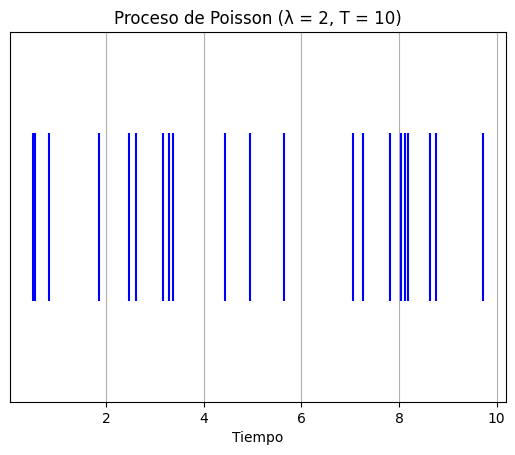

In [34]:
plt.eventplot(tiempos, orientation='horizontal', colors='blue')
plt.title("Proceso de Poisson (λ = 2, T = 10)")
plt.xlabel("Tiempo")
plt.yticks([])
plt.grid(True)
plt.show()

## Ejercicio 13

In [35]:
def simulacion_aficionados():
    # Paso 1: número de buses en 1 hora ~ Poisson(5)
    num_buses, _ = Poisson_homogeneo(lamda_=5, T=1)

    # Paso 2: para cada bus, generar una capacidad uniforme entre 20 y 40
    capacidades = np.random.randint(20, 41, size=num_buses) 

    # Paso 3: sumar capacidades para total de aficionados
    total_aficionados = np.sum(capacidades)

    return num_buses, total_aficionados

buses, aficionados = simulacion_aficionados()
print(f"Número de autobuses: {buses}")
print(f"Total de aficionados que llegaron: {aficionados}")


Número de autobuses: 14
Total de aficionados que llegaron: 392


### Calculo de la esperanza  
- El número de autobuses en 1 hora es N∼Poisson(λ=5)
- La capacidad de cada autobús Ci∼Uniforme discreta{20,21,…,40} independiente de N  

Queremos calcular E[A] = E[Total de aficionados] = E[sumat_{i=1}^{N} C_i]  

Este es un caso clásico de suma aleatoria de variables aleatorias independientes, y se aplica la fórmula del valor esperado condicional: E[A]=E[N]⋅E[C]  

- Esperanza del número de autobuses
E[N]=λ=5

- Esperanza de la capacidad de un bus  
Capacidad C∼Uniforme discreta en {20,…,40} Hay 21 valores, y la media es:  
E[C] = (20 + 40) / 2 = 30

- Resultado teorico:  
E[A] = 5 * 30 = 150 aficionados por hora


In [36]:
resultados = [simulacion_aficionados()[1] for _ in range(10000)]
media_practica = np.mean(resultados)
print(f"Estimación práctica de la esperanza: {media_practica:.2f}")


Estimación práctica de la esperanza: 150.37


## Ejercicio 14  
Procesos de Poisson no homogeneos


In [37]:
# i)

# Maximo en 7, 0 <= t <= 3, osea T = 3  
def lambda_t_i(t):
    return 3 + 4 / (t + 1)

# Maximo en 21, 0 <= t <= 5, osea T = 5
def lambda_t_ii(t):
    return t**2 - 9*t + 21

# Maximo en 1/2, 2 <= t <= 6, osea T = 6
def lambda_t_iii(t):
    if 2 <= t <= 3:
        return t/2 - 1
    elif 3 < t <= 6:
        return 1 - t/6
    else: 
        return 0

def Poisson_no_homogeneo_adelgazamiento(T, lambda_max, lambda_t, T_inicial=0):
    'Devuelve el numero de eventos NT y los tiempos en eventos'
    'lambda_t(t): intensidad, lambda_t(t) <= lambda'
    NT = 0
    Eventos = []
    u = 1 - random()
    t = -(np.log(u) / lambda_max) + T_inicial
    while t <= T:
        v = random()
        if v < lambda_t(t) / lambda_max:
            NT += 1
            Eventos.append(t)
        t += -np.log(1 - random()) / lambda_max
    return NT, Eventos

print("Inciso i) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
n_eventos, tiempos = Poisson_no_homogeneo_adelgazamiento(T=3, lambda_max=7, lambda_t=lambda_t_i)
print(f"Número de eventos aceptados: {n_eventos}")
print(f"Tiempos de arribo: {tiempos}")

print("Inciso ii) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
n_eventos, tiempos = Poisson_no_homogeneo_adelgazamiento(T=5, lambda_max=21, lambda_t=lambda_t_ii)
print(f"Número de eventos aceptados: {n_eventos}")
print(f"Tiempos de arribo: {tiempos}")

print("Inciso iii) ~~~~~~~~~~~~~~~~~~~~~~~~~~~")
n_eventos, tiempos = Poisson_no_homogeneo_adelgazamiento(T=6, lambda_max=1/2, lambda_t=lambda_t_iii, T_inicial=2)
print(f"Número de eventos aceptados: {n_eventos}")
print(f"Tiempos de arribo: {tiempos}")



Inciso i) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Número de eventos aceptados: 18
Tiempos de arribo: [0.12985852624223798, 0.15372009811895335, 0.23987989959180733, 0.28134136015676586, 0.5094632402535053, 0.6313998864482133, 1.1711273453068973, 1.3163581983554582, 1.3857054787590555, 1.4149184757944133, 1.4713692646597916, 1.477743680339148, 1.5113077574669003, 1.7049536507380794, 1.7205644511011695, 1.805570067749849, 2.191673878853822, 2.9824214831369678]
Inciso ii) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Número de eventos aceptados: 29
Tiempos de arribo: [0.035428394189000165, 0.07373344912912999, 0.1006964520261659, 0.2007122971539854, 0.21315427213005345, 0.22493347415853995, 0.2607578004250996, 0.2936185008443948, 0.3043844411526704, 0.30560725444141096, 0.41202294579082516, 0.422134759309547, 0.616940603134534, 0.6324242191377665, 0.6695943142804308, 0.7184705202604373, 0.7676771251930427, 1.068382517289034, 1.2221182248660791, 1.2638866864027767, 1.4750122941449724, 1.6756713977707953, 1.773933693

In [38]:
# Esrimaciones
print("Inciso i) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
valores = [Poisson_no_homogeneo_adelgazamiento(T=3, lambda_max=7, lambda_t=lambda_t_i)[0] for _ in range(10000)]
media_simulada = np.mean(valores)
print(f"Media simulada: {media_simulada:.4f}")
print(f"Media teórica: {9 + 4 * np.log(4):.4f}")

print("Inciso ii) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
valores = [Poisson_no_homogeneo_adelgazamiento(T=5, lambda_max=21, lambda_t=lambda_t_ii)[0] for _ in range(10000)]
media_simulada = np.mean(valores)
print(f"Media simulada: {media_simulada:.4f}")
print(f"Media teórica: {205/6:.4f}")

print("Inciso iii) ~~~~~~~~~~~~~~~~~~~~~~~~~~~")
valores = [Poisson_no_homogeneo_adelgazamiento(T=6, lambda_max=1/2, lambda_t=lambda_t_iii, T_inicial=2)[0] for _ in range(10000)]
media_simulada = np.mean(valores)
print(f"Media simulada: {media_simulada:.4f}")
print(f"Media teórica: {1.0000}")


Inciso i) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Media simulada: 14.5193
Media teórica: 14.5452
Inciso ii) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Media simulada: 34.1060
Media teórica: 34.1667
Inciso iii) ~~~~~~~~~~~~~~~~~~~~~~~~~~~
Media simulada: 0.9965
Media teórica: 1.0


In [39]:
# b)

def adelgazamiento_subintervalos(intervalos, lambda_t):
    eventos_totales = []

    for (t_ini, t_fin) in intervalos:
        # Calcular el lambda_max local numéricamente (puede evaluarse en una grilla fina)
        ts = np.linspace(t_ini, t_fin, 100)
        lambda_max_local = max(lambda_t(t) for t in ts)
        print(lambda_max_local)

        # Simular eventos en ese subintervalo
        NT, eventos = Poisson_no_homogeneo_adelgazamiento(
            T=t_fin,
            lambda_max=lambda_max_local,
            lambda_t=lambda_t,
            T_inicial=t_ini
        )
        eventos_totales.extend(eventos)

    return sorted(eventos_totales)


intervalos_i    = [(0, 0.5), (0.5, 1), (1, 2), (2, 3)]
intervalos_ii   = [(0, 0.125), (0.125, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1), (1, 1.25), (1.25, 1.5), (1.5, 1.75), (1.75, 2), (2, 2.5), (2.5, 3), (3,4), (4, 5)]
intervalos_iii  = [(2, 2.5), (2.5, 3), (3, 4.5), (4.5, 6)]

eventos = adelgazamiento_subintervalos(intervalos_iii, lambda_t_iii)
print(f"Total eventos: {len(eventos)}")

0.25
0.5
0.5
0.25
Total eventos: 1
